In [1]:
import pandas as pd
import numpy as np

In [2]:
invoices_df = pd.read_csv("./Data/invoices.csv")
invoices_df["issue_date"] = pd.to_datetime(invoices_df["issue_date"])

In [3]:
#filtering for only the sales and the expenses
sales = invoices_df[invoices_df["is_sale"]==True]
expenses = invoices_df[invoices_df["is_sale"]==False]

In [4]:
sales.head()

,Unnamed: 0,id,issue_date,due_date,paid_date,paid,contact_id,total,amount_due,exchange_rate,currency,is_sale
0,0,90381d5a-9348-4208-915c-60b082378370,2021-01-31 00:00:00+00:00,2021-02-06T00:00:00.000Z,2021-02-06T00:00:00.000Z,True,8e81fbc4-4f33-4ae9-bf5e-a2415372e77b,174.800000,0.0,1.0000,GBP,True
1,1,e4f53ac4-3aa8-4332-9082-c6551e09d90b,2021-02-23 00:00:00+00:00,2021-02-28T00:00:00.000Z,NaN,False,e0857d09-69cc-4608-83b8-7e2083e678a3,10000.000000,0.0,1.0000,GBP,True
2,2,3dec381c-7af5-436d-8b35-2d3a69b95f89,2021-02-28 00:00:00+00:00,2021-03-06T00:00:00.000Z,2021-03-06T00:00:00.000Z,True,8e81fbc4-4f33-4ae9-bf5e-a2415372e77b,174.800000,0.0,1.0000,GBP,True
3,3,aca26d49-abcb-4320-ac50-e0e613e34393,2021-03-07 00:00:00+00:00,2021-03-25T00:00:00.000Z,2022-04-05T00:00:00.000Z,True,cf2b417f-352e-486f-a5e0-a32cbbfa0826,848.346016,0.0,1.9317,NZD,True
4,4,d1c5eee6-9b87-46ed-a153-0a344f242675,2021-03-14 00:00:00+00:00,2021-04-30T00:00:00.000Z,2021-04-30T00:00:00.000Z,True,d7d2b5fc-32e7-4011-94a4-2c8aa0ff9e4f,1725.000000,0.0,1.0000,GBP,True


In [5]:
expenses.head()

,Unnamed: 0,id,issue_date,due_date,paid_date,paid,contact_id,total,amount_due,exchange_rate,currency,is_sale
173,173,9b8708b8-fb09-489f-9bb2-3d19e7c83174,2021-01-01 00:00:00+00:00,2021-01-30T00:00:00.000Z,2022-04-25T00:00:00.000Z,True,1430511a-f15f-435e-901a-1801064b76c2,15.000000,0.0,1.0000,GBP,False
174,174,3da245f9-8fda-41d8-9efc-b7284d3f0ac0,2021-02-01 00:00:00+00:00,2021-02-28T00:00:00.000Z,2022-02-28T00:00:00.000Z,True,1430511a-f15f-435e-901a-1801064b76c2,15.000000,0.0,1.0000,GBP,False
175,175,5c9b77ca-1b41-4827-b0b5-adcd8fb482c1,2021-03-01 00:00:00+00:00,2021-03-30T00:00:00.000Z,2022-03-30T00:00:00.000Z,True,1430511a-f15f-435e-901a-1801064b76c2,15.000000,0.0,1.0000,GBP,False
176,176,b887446c-8d9e-4f7a-9e9f-3e5948160161,2021-03-05 00:00:00+00:00,2021-03-30T00:00:00.000Z,2022-03-30T00:00:00.000Z,True,89ea79cb-a445-4720-8368-b0887f4157bb,135.137676,0.0,21.2746,ZAR,False
177,177,bb502950-77e7-4836-92f0-16ee935641e1,2021-03-08 00:00:00+00:00,2021-04-30T00:00:00.000Z,2021-04-30T00:00:00.000Z,True,1e6ba27d-e209-4b30-8894-8e1190c391e4,115.000000,0.0,1.0000,GBP,False


# Building An ARIMA models for forecasting

In [6]:
time_series_data_sales = sales.resample('M', on='issue_date').sum()['total']
time_series_data_expenses = expenses.resample('M', on='issue_date').sum()['total']

In [7]:
print(time_series_data_sales.shape)
print(time_series_data_expenses.shape)

(32,)
(32,)


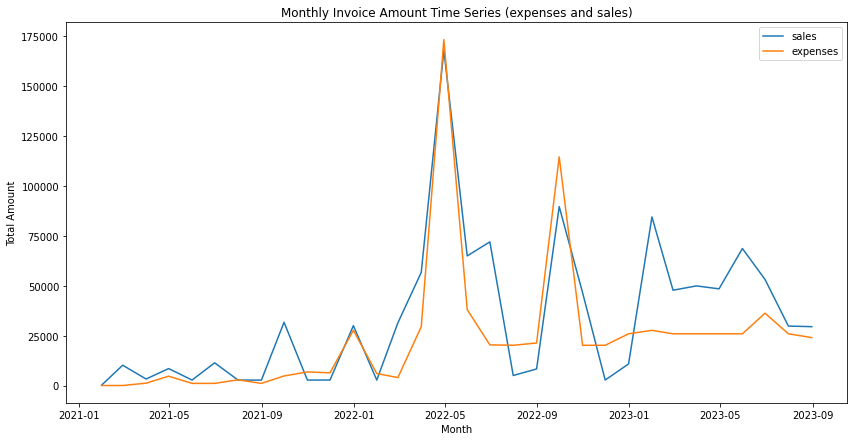

In [8]:
import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(time_series_data_sales, label="sales")
plt.plot(time_series_data_expenses, label="expenses")
plt.title('Monthly Invoice Amount Time Series (expenses and sales)')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.legend()
plt.show()

## ARIMA for sales

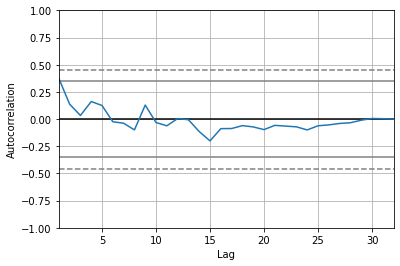

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  total   No. Observations:                   32
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -368.391
Date:                Sat, 16 Sep 2023   AIC                            748.781
Time:                        15:50:55   BIC                            757.385
Sample:                    01-31-2021   HQIC                           751.586
                         - 08-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5147      0.210     -2.451      0.014      -0.926      -0.103
ar.L2         -0.4137      0.241     -1.716      0.086      -0.886       0.059
ar.L3         -0.4049      0.231     -1.751      0.080      -0.858       0.048
ar.L4         -0.1386      0.193     -0.719      0.472      -0.517       0.239
ar.L5         -0.0069      0.262     -0.026      0.979      -0.520       0.507
sigma2      1.421e+09   2.29e-10    6.2e+18      0.000    1.42e+09    1.42e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                26.44
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               4.84   Skew:                             1.31
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.8e+34. Standard errors may be unstable.
"""

In [9]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

# Display the autocorrelation plot of the time series
autocorrelation_plot(time_series_data_sales)
plt.show()

# Fit ARIMA model (using initial guess of p=5, d=1, q=0)
model_sales = ARIMA(time_series_data_sales, order=(5, 1, 0))
model_fit_sales = model_sales.fit()

# Summary of the model
model_fit_sales.summary()

The ARIMA model has been successfully fitted to the time series data. The model summary provides various statistical measures to evaluate the model's performance.

The coefficients for the AR terms (ar.L1, ar.L2, etc.) show the impact of past observations on the current value.
The p-values (P>|z|) for some terms are greater than 0.05, suggesting that those terms might not be statistically significant.
The Ljung-Box test and Jarque-Bera test give us insights into the model's residuals.

In [10]:
forecast_sales = model_fit_sales.forecast(steps=1)
forecast_sales

2023-09-30 00:00:00+00:00    42769.373622
Freq: M, dtype: float64

## ARIMA for expenses

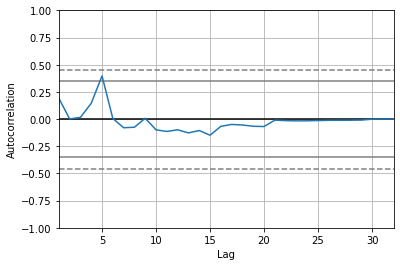

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  total   No. Observations:                   32
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -365.690
Date:                Sat, 16 Sep 2023   AIC                            743.380
Time:                        15:50:56   BIC                            751.984
Sample:                    01-31-2021   HQIC                           746.185
                         - 08-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7487      0.264     -2.834      0.005      -1.266      -0.231
ar.L2         -0.6732      0.564     -1.193      0.233      -1.779       0.433
ar.L3         -0.5576      0.447     -1.247      0.212      -1.434       0.319
ar.L4         -0.3939      0.362     -1.088      0.277      -1.104       0.316
ar.L5          0.0433      0.327      0.132      0.895      -0.598       0.684
sigma2      1.173e+09   7.62e-10   1.54e+18      0.000    1.17e+09    1.17e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               428.00
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              30.44   Skew:                             3.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.72e+33. Standard errors may be unstable.
"""

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

# Display the autocorrelation plot of the time series
autocorrelation_plot(time_series_data_expenses)
plt.show()

# Fit ARIMA model (using initial guess of p=5, d=1, q=0)
model_expenses = ARIMA(time_series_data_expenses, order=(5, 1, 0))
model_fit_expenses = model_expenses.fit()

# Summary of the model
model_fit_expenses.summary()

In [12]:
forecast_expenses = model_fit_expenses.forecast(steps=1)
forecast_expenses

2023-09-30 00:00:00+00:00    26618.486887
Freq: M, dtype: float64

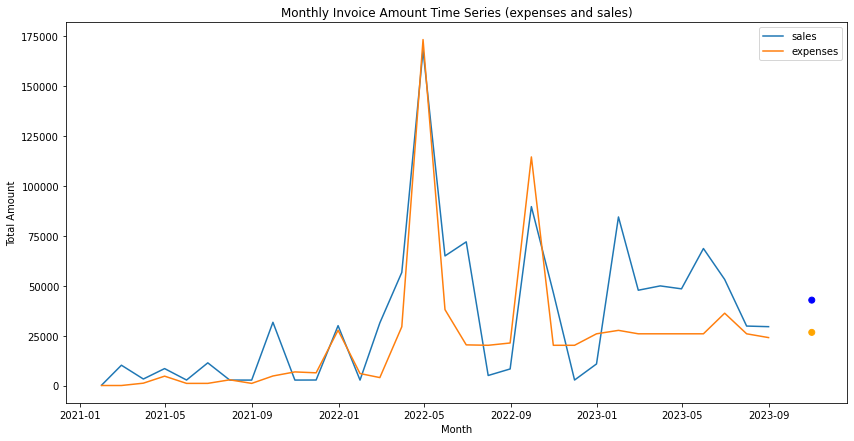

In [13]:
import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(time_series_data_sales, label="sales")
plt.plot(time_series_data_expenses, label="expenses")
#Adding the new predictions
october_date = pd.Timestamp('2023-10-31')
plt.scatter([october_date, october_date], [forecast_sales, forecast_expenses], color=['blue', 'orange'])

plt.title('Monthly Invoice Amount Time Series (expenses and sales)')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.legend()
plt.show()

The models will imporve with more data as seasonality will be more apparent and other factors can also be added

## LSTM implementations

Creating a function for the implementation

In [14]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

def LSTM_forecast(time_series_data):
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    time_series_data_scaled = scaler.fit_transform(np.array(time_series_data).reshape(-1, 1))

    # Converting time series data to supervised learning problem
    def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset) - look_back - 1):
            a = dataset[i:(i + look_back), 0]
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
        return np.array(dataX), np.array(dataY)

    # Preparing the dataset with a look_back period of 1 month
    look_back = 1
    X, y = create_dataset(time_series_data_scaled, look_back)

    # Reshaping the input to be [samples, time steps, features]
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X, y, epochs=100, batch_size=1, verbose=1)
    forecast = model.predict(np.array([[time_series_data_scaled[-1]]]).reshape(1, 1, 1))
    # Inverse transform the forecasted value to get it back to the original scale
    forecast = scaler.inverse_transform(forecast)

    return forecast[0][0]



In [15]:
october_sales_LSTM = LSTM_forecast(time_series_data_sales)
october_expenses_LSTM = LSTM_forecast(time_series_data_expenses)

Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 0.0817
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0709
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0640
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0582
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0541
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0513
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0490
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0476
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0466
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0458
Epoch 11/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0455
Epoch 12/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0451
Epoch 13/100
30/30 [=================

30/30 [==============================] - 0s 3ms/step - loss: 0.0471
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0444
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0420
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0408
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0402
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0396
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0393
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0393
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0392
Epoch 11/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0391
Epoch 12/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0391
Epoch 13/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 14/100
30/30 [============================

In [16]:
print("Sales Prediction for October LSTM: ",october_sales_LSTM, "vs ARIMA: ", forecast_sales)
print("Expenses Prediction for October LSTM: ",october_expenses_LSTM, "vs ARIMA: ", forecast_expenses)

Sales Prediction for October LSTM:  34235.582 vs ARIMA:  2023-09-30 00:00:00+00:00    42769.373622
Freq: M, dtype: float64
Expenses Prediction for October LSTM:  25150.453 vs ARIMA:  2023-09-30 00:00:00+00:00    26618.486887
Freq: M, dtype: float64


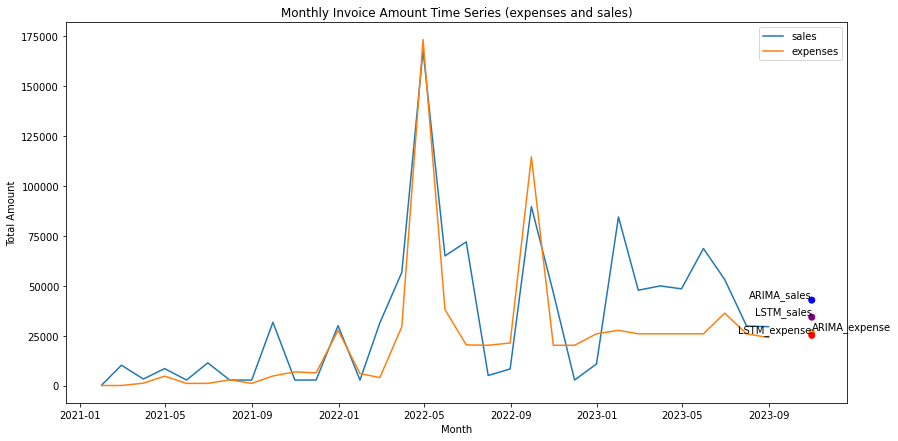

In [17]:
import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(time_series_data_sales, label="sales")
plt.plot(time_series_data_expenses, label="expenses")
#Adding the new predictions
october_date = pd.Timestamp('2023-10-31')
plt.scatter([october_date, october_date], [forecast_sales, forecast_expenses], color=['blue', 'orange'])
plt.scatter([october_date, october_date], [october_sales_LSTM, october_expenses_LSTM], color=['purple', 'red'])

plt.text(october_date, forecast_sales, 'ARIMA_sales', verticalalignment='bottom', horizontalalignment='right')
plt.text(october_date, forecast_expenses, 'ARIMA_expense', verticalalignment='bottom', horizontalalignment='left')
plt.text(october_date, october_sales_LSTM, 'LSTM_sales', verticalalignment='bottom', horizontalalignment='right')
plt.text(october_date, october_expenses_LSTM, 'LSTM_expense', verticalalignment='bottom', horizontalalignment='right')

plt.title('Monthly Invoice Amount Time Series (expenses and sales)')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.legend()
plt.show()